In [18]:
import pandas as pd
import skmob
from skmob.measures.individual import radius_of_gyration
from skmob.measures.individual import maximum_distance
from skmob.measures.individual import number_of_locations
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/dados_18.11/df_main_full.csv')
#df.drop(columns={'Unnamed: 0'}, inplace=True)
df['FULL_DATE']= df['DATE'] + 'T' + df['HOUR'] + 'Z'
df

,DATE,HOUR,DURATION,DDD_USER_FROM,USER_FROM,DDD_USER_TO,USER_TO,ANTENNA,8,9,10,11,12,13,14,DAY_OF_WEEK,ANTENNA_ID,PRESUMED_RESIDENCE,classe,FULL_DATE
0,2013-04-03,17:09:03,0.80,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,FFA5E22189ED7ADEB364CFEB18205B59,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Wednesday,SJDR5,SJDR5,3,2013-04-03T17:09:03Z
1,2013-04-09,15:34:30,5.12,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,CCA21FFF10C7EC088827F5D5770D3274,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Tuesday,SJDR5,SJDR5,3,2013-04-09T15:34:30Z
2,2013-04-09,15:23:38,1.53,83.0,00003F26576D1122848B6F3CEEC250E5,-4.0,64142FC9CDA8A82085271FB9D25FCDBF,50141.0,NaN,299.0,SERVICO NAO GEOGRAFICO,OI,TNL,PRE PAGO,300000210.0,Tuesday,SJDR5,SJDR5,3,2013-04-09T15:23:38Z
3,2013-04-10,16:26:16,0.35,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,BD288CE0AB2A0B5E57EB635FBF814C80,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Wednesday,SJDR5,SJDR5,3,2013-04-10T16:26:16Z
4,2013-04-12,22:47:37,0.07,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,8BA3ED7CA5B5E5D556AF30AE93D578FD,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Friday,SJDR5,SJDR5,3,2013-04-12T22:47:37Z
5,2013-04-13,19:53:04,0.87,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,73DBAC87ED341B9B1C0E9DC785C78821,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Saturday,SJDR5,SJDR5,3,2013-04-13T19:53:04Z
6,2013-04-13,13:57:49,0.38,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,65DE41CBC83929E9E926C2DD922D5F5B,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Saturday,SJDR5,SJDR5,3,2013-04-13T13:57:49Z
7,2013-04-14,20:54:33,0.12,83.0,00003F26576D1122848B6F3CEEC250E5,21.0,A49BA005920B8BA24BEE40F455B69B9B,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Sunday,SJDR5,SJDR5,3,2013-04-14T20:54:33Z
8,2013-04-14,20:57:52,4.85,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,65DE41CBC83929E9E926C2DD922D5F5B,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Sunday,SJDR5,SJDR5,3,2013-04-14T20:57:52Z
9,2013-04-15,14:58:32,1.30,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,65DE41CBC83929E9E926C2DD922D5F5B,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Monday,SJDR5,SJDR5,3,2013-04-15T14:58:32Z


In [3]:
df_antennas = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/antenas/antennas_with_id.csv')
df_antennas = df_antennas.groupby('ANTENNA_ID').first().reset_index()
df = pd.merge(df, df_antennas[['ANTENNA_ID', 'LONG', 'LAT']], on='ANTENNA_ID')
df.head()

,DATE,HOUR,DURATION,DDD_USER_FROM,USER_FROM,DDD_USER_TO,USER_TO,ANTENNA,8,9,...,12,13,14,DAY_OF_WEEK,ANTENNA_ID,PRESUMED_RESIDENCE,classe,FULL_DATE,LONG,LAT
0,2013-04-03,17:09:03,0.80,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,FFA5E22189ED7ADEB364CFEB18205B59,50141.0,NaN,117.0,...,OI,PRE PAGO,300000210.0,Wednesday,SJDR5,SJDR5,3,2013-04-03T17:09:03Z,-44.25834,-21.13589
1,2013-04-09,15:34:30,5.12,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,CCA21FFF10C7EC088827F5D5770D3274,50141.0,NaN,117.0,...,OI,PRE PAGO,300000210.0,Tuesday,SJDR5,SJDR5,3,2013-04-09T15:34:30Z,-44.25834,-21.13589
2,2013-04-09,15:23:38,1.53,83.0,00003F26576D1122848B6F3CEEC250E5,-4.0,64142FC9CDA8A82085271FB9D25FCDBF,50141.0,NaN,299.0,...,TNL,PRE PAGO,300000210.0,Tuesday,SJDR5,SJDR5,3,2013-04-09T15:23:38Z,-44.25834,-21.13589
3,2013-04-10,16:26:16,0.35,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,BD288CE0AB2A0B5E57EB635FBF814C80,50141.0,NaN,117.0,...,OI,PRE PAGO,300000210.0,Wednesday,SJDR5,SJDR5,3,2013-04-10T16:26:16Z,-44.25834,-21.13589
4,2013-04-12,22:47:37,0.07,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,8BA3ED7CA5B5E5D556AF30AE93D578FD,50141.0,NaN,117.0,...,OI,PRE PAGO,300000210.0,Friday,SJDR5,SJDR5,3,2013-04-12T22:47:37Z,-44.25834,-21.13589


In [4]:
tdf = skmob.TrajDataFrame(df, latitude='LAT', longitude='LONG', datetime='FULL_DATE', user_id='USER_FROM')
rg_df = round(radius_of_gyration(tdf),7)
rg_df.rename(columns={'uid': 'USER_FROM'}, inplace=True)
rg_df.head()

100%|██████████| 59786/59786 [02:04<00:00, 478.45it/s]


,USER_FROM,radius_of_gyration
0,00003F26576D1122848B6F3CEEC250E5,0.000000
1,000579E8BA1DA9E5292392473BCCCD2A,8.204003
2,0008962B966EF6C5571DF03F5C786677,1.698892
3,0008B7FB336065A53EC31AD06D712E28,0.000000
4,0008B8E32E18BF4450B7CAAF0C1CE179,0.000000


In [5]:
df_grouped = df.groupby('USER_FROM').first().reset_index()
rg_df.rename(columns={'uid': 'USER_FROM'}, inplace=True)
rg_df_with_class = pd.merge(rg_df, df_grouped[['USER_FROM', 'classe']], on='USER_FROM')
rg_df_with_class

,USER_FROM,radius_of_gyration,classe
0,00003F26576D1122848B6F3CEEC250E5,0.000000,3
1,000579E8BA1DA9E5292392473BCCCD2A,8.204003,2
2,0008962B966EF6C5571DF03F5C786677,1.698892,2
3,0008B7FB336065A53EC31AD06D712E28,0.000000,2
4,0008B8E32E18BF4450B7CAAF0C1CE179,0.000000,3
5,0008B94CADE67ACABE2CB3F8DB477CC5,0.000000,2
6,000A16372A762FD3BB2A59334780CDEA,1.872543,3
7,000B663095EB50650DC40A0D8A23C868,21.157054,2
8,000D1DF8B25B4C1728D16E1510BC72BE,0.000000,3
9,000DDDA8D62CC0A09B505AA27279CCF8,0.000000,3


In [6]:
rg_df_grouped_class = rg_df_with_class.groupby('classe')['radius_of_gyration'].mean().reset_index()
rg_df_grouped_class.loc[len(rg_df_grouped_class)] = ['All', rg_df_grouped_class['radius_of_gyration'].mean()]
rg_df_grouped_class

,classe,radius_of_gyration
0,2,2.203566
1,3,1.413088
2,All,1.808327


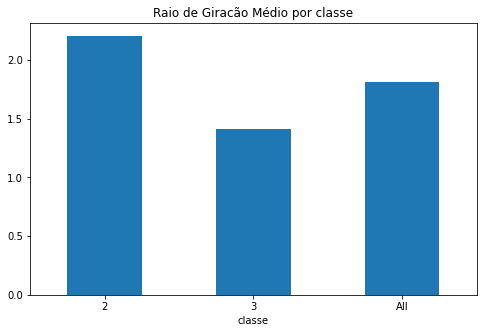

In [23]:
rg_df_grouped_class.plot.bar(x='classe', 
                             y='radius_of_gyration',
                             title='Raio de Giracão Médio por classe', 
                             rot=360,  
                             legend=False,
                             figsize=(8,5))
plt.savefig('/home/gustavo/Desktop/Mestrado/mestrado_dados/metricas_scikit-mobility/raio_giracao_sj.png')
plt.show()

In [13]:
md_df = round(maximum_distance(tdf), 7)
md_df.rename(columns={'uid': 'USER_FROM'}, inplace=True)
md_df.head()

100%|██████████| 59786/59786 [03:38<00:00, 273.53it/s]


,USER_FROM,maximum_distance
0,00003F26576D1122848B6F3CEEC250E5,0.000000
1,000579E8BA1DA9E5292392473BCCCD2A,29.397005
2,0008962B966EF6C5571DF03F5C786677,4.854988
3,0008B7FB336065A53EC31AD06D712E28,0.000000
4,0008B8E32E18BF4450B7CAAF0C1CE179,0.000000


In [15]:
md_df_with_class = pd.merge(md_df, df_grouped[['USER_FROM', 'classe']], on='USER_FROM')
md_df_with_class

,USER_FROM,maximum_distance,classe
0,00003F26576D1122848B6F3CEEC250E5,0.000000,3
1,000579E8BA1DA9E5292392473BCCCD2A,29.397005,2
2,0008962B966EF6C5571DF03F5C786677,4.854988,2
3,0008B7FB336065A53EC31AD06D712E28,0.000000,2
4,0008B8E32E18BF4450B7CAAF0C1CE179,0.000000,3
5,0008B94CADE67ACABE2CB3F8DB477CC5,0.000000,2
6,000A16372A762FD3BB2A59334780CDEA,4.854988,3
7,000B663095EB50650DC40A0D8A23C868,72.074669,2
8,000D1DF8B25B4C1728D16E1510BC72BE,0.000000,3
9,000DDDA8D62CC0A09B505AA27279CCF8,0.000000,3


In [16]:
md_df_grouped_class = md_df_with_class.groupby('classe')['maximum_distance'].mean().reset_index()
md_df_grouped_class.loc[len(md_df_grouped_class)] = ['All', md_df_grouped_class['maximum_distance'].mean()]
md_df_grouped_class

,classe,maximum_distance
0,2,6.702631
1,3,4.480628
2,All,5.591629


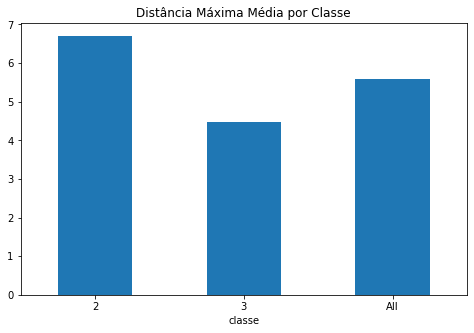

In [24]:
md_df_grouped_class.plot.bar(x='classe', 
                             y='maximum_distance',
                             title='Distância Máxima Média por Classe', 
                             rot=360,  
                             legend=False,
                             figsize=(8,5))

plt.savefig('/home/gustavo/Desktop/Mestrado/mestrado_dados/metricas_scikit-mobility/distancia_maxima_sj.png')
plt.show()

In [19]:
nl_df = round(number_of_locations(tdf),7)
nl_df.rename(columns={'uid': 'USER_FROM'}, inplace=True)
nl_df.head()

100%|██████████| 59786/59786 [04:02<00:00, 246.59it/s]


,USER_FROM,number_of_locations
0,00003F26576D1122848B6F3CEEC250E5,1
1,000579E8BA1DA9E5292392473BCCCD2A,3
2,0008962B966EF6C5571DF03F5C786677,2
3,0008B7FB336065A53EC31AD06D712E28,1
4,0008B8E32E18BF4450B7CAAF0C1CE179,1


In [20]:
nl_df_with_class = pd.merge(nl_df, df_grouped[['USER_FROM', 'classe']], on='USER_FROM')
nl_df_with_class

,USER_FROM,number_of_locations,classe
0,00003F26576D1122848B6F3CEEC250E5,1,3
1,000579E8BA1DA9E5292392473BCCCD2A,3,2
2,0008962B966EF6C5571DF03F5C786677,2,2
3,0008B7FB336065A53EC31AD06D712E28,1,2
4,0008B8E32E18BF4450B7CAAF0C1CE179,1,3
5,0008B94CADE67ACABE2CB3F8DB477CC5,1,2
6,000A16372A762FD3BB2A59334780CDEA,2,3
7,000B663095EB50650DC40A0D8A23C868,2,2
8,000D1DF8B25B4C1728D16E1510BC72BE,1,3
9,000DDDA8D62CC0A09B505AA27279CCF8,1,3


In [21]:
nl_df_grouped_class = nl_df_with_class.groupby('classe')['number_of_locations'].mean().reset_index()
nl_df_grouped_class.loc[len(nl_df_grouped_class)] = ['All', nl_df_grouped_class['number_of_locations'].mean()]
nl_df_grouped_class

,classe,number_of_locations
0,2,1.351125
1,3,1.608356
2,All,1.479740


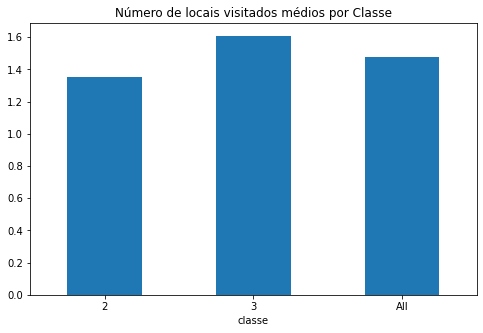

In [26]:
nl_df_grouped_class.plot.bar(x='classe', 
                             y='number_of_locations',
                             title='Número de locais visitados médios por Classe', 
                             rot=360,  
                             legend=False,
                             figsize=(8,5))

plt.savefig('/home/gustavo/Desktop/Mestrado/mestrado_dados/metricas_scikit-mobility/locais_visitados_sj.jpg')
plt.show()